In [95]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(8, suppress=True)

plt.style.use([
    'grid',
    'notebook'
])

In [96]:
k1, k2, k3 = 1.04*(16.46), 0.95*(32.4), 0.93*(185.48)
b2, b3 = 0.95*(-83.93), 0.93*(-167.01)

A_vertices = []

Ts = 4

r = 31
mu = 40
sigma = 55
a4 = 3019

B = np.array([
    [0],
    [k1/a4]
])

In [97]:
level3 = np.load('./data/level3.npy')
level4 = np.load('./data/level4.npy')

level_diff = level3 - level4

R43 = (k2*level_diff + b2)
R43[level_diff < 5] = 78

q_out = .965*(k3 * np.sqrt(level3) + b3)

a3_1 = np.cos(2.5*np.pi * (level3 - mu)) / (sigma * np.sqrt(2 * np.pi))
a3_2 = np.exp(-((level3 - mu)**2) / (2 * sigma**2))

a3 = ((3*r)/5) * (2.7*r - a3_1 * a3_2)

Z1 = Ts/R43
Z2 = (Ts*q_out)/a4
Z3 = 1/a3

z1_min, z1_max = np.min(Z1), np.max(Z1),
z2_min, z2_max = np.min(Z2), np.max(Z2)
z3_min, z3_max = np.min(Z3), np.max(Z3)

z1_interval = [z1_min, z1_max]
z2_interval = [z2_min, z2_max]
z3_interval = [z3_min, z3_max]

for z1 in z1_interval:
    for z2 in z2_interval:
        for z3 in z3_interval:
            A = np.array([
                [1 - z1*z3, z3*(z1-z2)],
                [z1/a4, 1 - (z1/a4)]
            ])

            print(np.abs(
                np.linalg.eigvals(A)
            ))

            A_vertices.append(A)

[0.99999769 0.99999769]
[0.99999769 0.99999769]
[0.99999769 0.99999769]
[0.99999769 0.99999769]
[0.99997382 0.99997382]
[0.99997382 0.99997382]
[0.99997383 0.99997383]
[0.99997383 0.99997383]


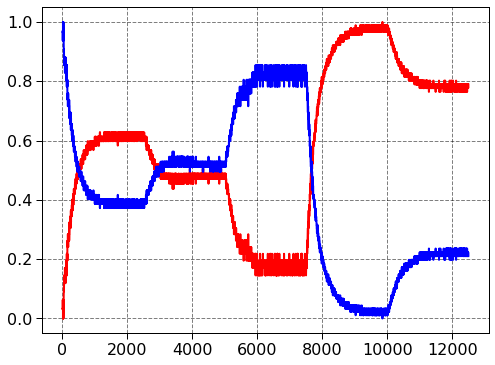

In [98]:
M1 = (Z1 - z1_min) / (z1_max - z1_min)
N1 = (Z2 - z2_min) / (z2_max - z2_min)
P1 = (Z3 - z3_min) / (z3_max - z3_min)

M2 = 1 - M1
N2 = 1 - N1
P2 = 1 - P1

plt.plot(N1, color='r')
plt.plot(N2, color='b')

In [99]:
for i in range(len(A_vertices)):
    A = A_vertices[i]
    np.save(f'./vertices/A_{i}', A)

np.save(f'./vertices/B', B)

In [100]:
import sympy as sp

Z1, Z2, Z3 = sp.symbols('Z1 Z2 Z3')

M1 = (Z1 - z1_min) / (z1_max - z1_min)
N1 = (Z2 - z2_min) / (z2_max - z2_min)
Q1 = (Z3 - z3_min) / (z3_max - z3_min)

M2 = 1 - M1
N2 = 1 - N1
Q2 = 1 - Q1

print(' ')
print(M1)
print(N1)
print(Q1)
print(' ')
print(M2)
print(N2)
print(Q2)

 
20.3969566782737*Z1 - 0.0968627666122476
1.21153800621479*Z2 - 0.2389443466253
9295044.23012624*Z3 - 5970.02819190981
 
1.09686276661225 - 20.3969566782737*Z1
1.2389443466253 - 1.21153800621479*Z2
5971.02819190981 - 9295044.23012624*Z3
